## Importing the Dependencies

In [158]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    roc_curve,
    auc,
    roc_auc_score
)


In [159]:
# loading the dataset to a Pandas Dataframe
credit_card_data = pd.read_csv('creditcard.csv')


In [160]:
# first 5 rows of the dataset 
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [161]:
credit_card_data.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [162]:
# dataset information
credit_card_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [163]:
#checking the number of missing values in each column
credit_card_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [164]:
# distribution of legit transaction & fraudulent transaction
credit_card_data['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

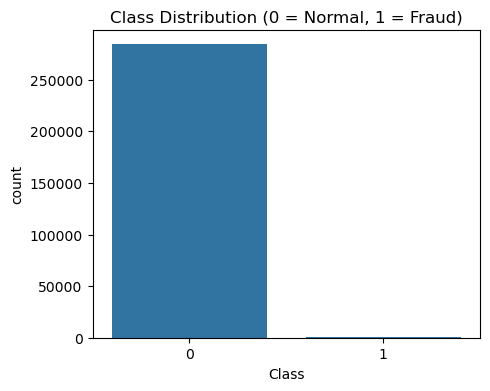

In [165]:
plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=credit_card_data)
plt.title('Class Distribution (0 = Normal, 1 = Fraud)')
plt.show()


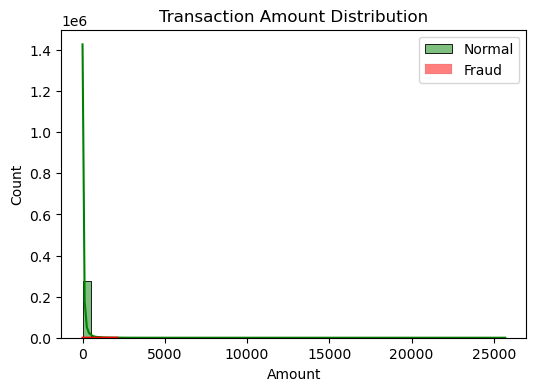

In [166]:
plt.figure(figsize=(6,4))
sns.histplot(credit_card_data[credit_card_data['Class']==0]['Amount'],
             bins=50, color='green', label='Normal', kde=True)

sns.histplot(credit_card_data[credit_card_data['Class']==1]['Amount'],
             bins=50, color='red', label='Fraud', kde=True)

plt.legend()
plt.title('Transaction Amount Distribution')
plt.show()


# This Dataset is Highly Unbalanced

## 0 -> Normal Transaction
## 1 -> Fraud Transaction

In [167]:
# Seperating he data for Analytics
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

In [168]:
print(legit.shape)
print(fraud.shape)

(284315, 31)
(492, 31)


In [169]:
# statistical measure of the data 
legit.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [170]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [171]:
# Compare the values for both transaction 
credit_card_data.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.202258,0.008258,-0.006271,0.012171,-0.007860,0.005453,0.002419,0.009637,-0.000987,0.004467,...,-0.000644,-0.001235,-0.000024,0.000070,0.000182,-0.000072,-0.000089,-0.000295,-0.000131,88.291022
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


# Under Sampling 
## Build a Sample Dataset containing similar distribution of Normal Transactions and Fraudulent Transaction

## Number of Fraudulent Transaction -> 492


In [172]:
legit_sample = legit.sample(n=492)

## Concatenating two Dataframes

In [173]:
new_dataset= pd.concat([legit_sample, fraud], axis=0)

In [174]:
new_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
167073,118471.0,0.178249,1.176970,-1.990144,-0.423174,1.105531,-1.039090,1.176239,0.098427,-0.953256,...,0.257766,0.687203,0.022575,0.745486,-0.283932,0.487866,-0.162142,-0.048115,42.81,0
175249,122257.0,-1.236180,-0.326804,0.929929,-2.154179,1.360566,0.943145,0.424928,0.508632,0.425211,...,0.400035,1.299725,-0.548008,-1.293407,1.006423,1.206051,-0.044165,0.001617,45.00,0
252653,155907.0,1.868073,-0.123217,-1.887871,0.621751,0.058929,-1.484955,0.373972,-0.387804,0.662516,...,0.239898,0.617358,-0.110854,-0.106745,0.206448,-0.108375,-0.023587,-0.013304,103.02,0
159071,112168.0,1.548740,-1.565719,0.174582,0.358569,-0.539409,3.015420,-1.782399,1.017446,2.577284,...,0.249329,1.095604,0.057137,-0.880323,-0.397951,0.072424,0.117369,-0.027878,123.35,0
273004,165373.0,-0.328727,0.166235,1.819403,-0.674161,-0.180923,-0.105768,0.233200,0.108436,0.570151,...,0.235660,0.840134,-0.215872,0.015523,-0.549143,0.494105,-0.054071,-0.078244,11.50,0


In [175]:
 new_dataset['Class'].value_counts()

Class
0    492
1    492
Name: count, dtype: int64

In [176]:
new_dataset.groupby('Class').mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,96795.951220,0.169942,-0.023810,-0.004884,-0.089852,-0.022122,-0.087540,0.044325,0.043568,-0.015528,...,0.006738,0.005417,0.027273,-0.009609,0.024249,-0.037208,0.013776,0.003318,0.005848,91.338618
1,80746.806911,-4.771948,3.623778,-7.033281,4.542029,-3.151225,-1.397737,-5.568731,0.570636,-2.581123,...,0.372319,0.713588,0.014049,-0.040308,-0.105130,0.041449,0.051648,0.170575,0.075667,122.211321


 ## Splitting the data into Features and Target 

In [177]:
X = new_dataset.drop(columns = 'Class', axis=1)
Y = new_dataset['Class']

In [178]:
print(X)

            Time        V1        V2        V3        V4        V5        V6  \
167073  118471.0  0.178249  1.176970 -1.990144 -0.423174  1.105531 -1.039090   
175249  122257.0 -1.236180 -0.326804  0.929929 -2.154179  1.360566  0.943145   
252653  155907.0  1.868073 -0.123217 -1.887871  0.621751  0.058929 -1.484955   
159071  112168.0  1.548740 -1.565719  0.174582  0.358569 -0.539409  3.015420   
273004  165373.0 -0.328727  0.166235  1.819403 -0.674161 -0.180923 -0.105768   
...          ...       ...       ...       ...       ...       ...       ...   
279863  169142.0 -1.927883  1.125653 -4.518331  1.749293 -1.566487 -2.010494   
280143  169347.0  1.378559  1.289381 -5.004247  1.411850  0.442581 -1.326536   
280149  169351.0 -0.676143  1.126366 -2.213700  0.468308 -1.120541 -0.003346   
281144  169966.0 -3.113832  0.585864 -5.399730  1.817092 -0.840618 -2.943548   
281674  170348.0  1.991976  0.158476 -2.583441  0.408670  1.151147 -0.096695   

              V7        V8        V9  .

In [179]:
print(Y)

167073    0
175249    0
252653    0
159071    0
273004    0
         ..
279863    1
280143    1
280149    1
281144    1
281674    1
Name: Class, Length: 984, dtype: int64


## Spilt the Data into Training Data & Testing Data 

In [180]:
X_train , X_test ,Y_train , Y_test = train_test_split(X , Y ,test_size = 0.2 , stratify = Y , random_state = 2)

In [181]:
print(X.shape,X_train.shape, X_test.shape)

(984, 30) (787, 30) (197, 30)


# Model Training 

## Logistic Regression

In [182]:
model = LogisticRegression(class_weight='balanced', max_iter=1000)


In [183]:
# Training the logistic Regression Model with Training Data
model.fit( X_train ,Y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


# Model Evaluation

## Accuracy Score

In [184]:
# accuracy on training data 
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction , Y_train)

In [185]:
print('Accuracy on Training data : ' , training_data_accuracy)

Accuracy on Training data :  0.9529860228716646


In [186]:
# accuracy on test data 
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction , Y_test)

In [187]:
print('Accuracy on Test data : ' , test_data_accuracy)

Accuracy on Test data :  0.949238578680203


In [188]:
Y_prob = model.predict_proba(X_test)[:, 1]


In [189]:
cm = confusion_matrix(Y_test, X_test_prediction)
print("Confusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(Y_test, X_test_prediction))


Confusion Matrix:
[[97  2]
 [ 8 90]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.98      0.95        99
           1       0.98      0.92      0.95        98

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



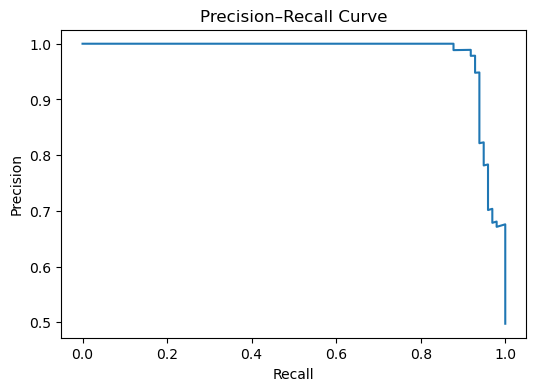

In [190]:
Y_prob = model.predict_proba(X_test)[:, 1]
precision, recall, _ = precision_recall_curve(Y_test, Y_prob)

plt.figure(figsize=(6,4))
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision–Recall Curve')
plt.show()



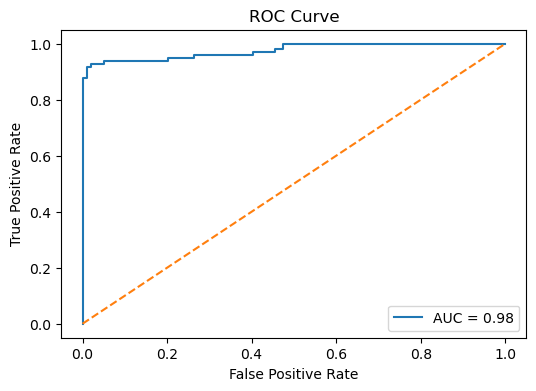

In [191]:
fpr, tpr, _ = roc_curve(Y_test, Y_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0,1],[0,1],'--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


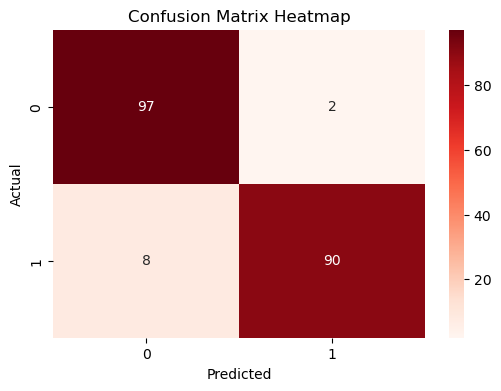

In [192]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')

plt.show()


In [193]:
roc_auc = roc_auc_score(Y_test, Y_prob)

print("ROC-AUC Score:", roc_auc)


ROC-AUC Score: 0.9756751185322614


In [194]:
import pickle

with open("fraud_model.pkl", "wb") as file:
    pickle.dump(model, file)


## This dataset is highly imbalanced, therefore accuracy alone is not a reliable metric.the model performance is evaluated using Precision–Recall Curve, Confusion Matrix, and Recall for the fraud class, which is critical in real-world fraud detection systems.

